In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Оценка на състоянието на мостовете в Ню Йорк

## Автор: Мехмед Чолаков

### Абстракт:
Целта на изследване да се обучи алгоритъм, който да предсказва състоянието на мостовете с помощта на дании от NYS - Департамент на транспортните мостови условия. След предсказване на състояниетона, първо да бъдат инспектирани мостовето в не добро състояние: рейтинг по-малко от 5. Обучени са 6 алгоритъма. 

### Въведение
Мостът е конструкция, изградена с цел безопасното преминаване на пешеходци, моторни превозни средства или влакове над физически препятствия като проход, долина, път, жп линии, река, залив или друг воден басейн. Мостовете са едно от най-старите инженерни изобретения на човечеството. Конструкциите им варират в зависимост от функцията на моста, характера на терена, използвания за направата материал и наличните средства за изграждане.

#### Въпрос е следният (класификация): В какво състояние е моста, познавайки други променливи?

### Анализ на данните
Таблицата, която ще използвам е от NYS - Департамент на транспортните мостови условия, съответно 10 променливи и 17 504 записа.
 - Регионален код - Държавен департамент на транспорта в Ню Йорк, в който се намира мостът:
 - Име на окръг - Окръгът, в който се намира мостът.
 - Община - Градът или общината, в която се намира мостът.
 - Местоположение - Разказващо местоположение на моста, свързан с кръстовището на американския или щатския маршрут, главен воден път, или най-близкия град, село, махали или топографски признак.
 - Маршрутизатор и референтен маркер - Писмено описание на магистралата или друга транспортна характеристика (път, маршрут и      т.н.)
 - Собственик - Собственик на мост (държава, орган, местен, друг).
 - Година - Годината, в която е построен мостът.
 - Дата - Дата на последното инспектиране на моста.
 - Статус - SD = Структурно недостатъчно; FO = функционално остарели; N = Нито (федерални стандарти).
 - Рейтинг на състоянието - Рейтинг на моста. Рейтинговата скала варира от 1 до 7, като 7 е в ново състояние и оценка от 5 или повече се счита за добро състояние

In [3]:
bridge_data = pd.read_csv("Data/bridge.csv")

In [4]:
bridge_data.head()

,Region Code,County Name,Municipality,Location,Route Carried and Reference Marker,Owner,Year Built,Date Last Inspected,SD FO Status,Condition Rating
0,1,Albany,Albany City,0.1 MI N JCT RTE 5 & I90,5 X,City,1968,2014-09-04T00:00:00,N,5.211
1,1,Albany,Albany City,JCT US 9 & PATROON CREEK,9 9 11081025,NYSDOT,1971,2015-10-27T00:00:00,N,4.750
2,1,Albany,Albany City,JCT RTE 9 & I90,9 9 11081028,NYSDOT,1971,2015-07-08T00:00:00,FO,4.833
3,1,Albany,Albany City,DOWNTOWN ALBANY,9 X,NYSDOT,1969,2015-10-14T00:00:00,FO,4.403
4,1,Albany,Albany City,0.1 MI S JCT RT 9W & I787,9W 9W11012007,NYSDOT,1966,2015-05-07T00:00:00,FO,4.328


In [5]:
bridge_data.shape

(17504, 10)

За да ми бъде по удобно ще променя името на колоните, т.е. да бъдат без интервали

In [6]:
bridge_data.columns

Index(['Region Code', 'County Name', 'Municipality', 'Location',
       'Route Carried and Reference Marker', 'Owner', 'Year Built',
       'Date Last Inspected', 'SD FO Status', 'Condition Rating'],
      dtype='object')

In [7]:
bridge_data.columns = ['region_code', 'county_name', 'municipality', 'location', 'route_carried_reference_marker', 'owner', 'year_built', 'date_last_inspected', 'status', 'condition_rating']

In [8]:
bridge_data.head()

,region_code,county_name,municipality,location,route_carried_reference_marker,owner,year_built,date_last_inspected,status,condition_rating
0,1,Albany,Albany City,0.1 MI N JCT RTE 5 & I90,5 X,City,1968,2014-09-04T00:00:00,N,5.211
1,1,Albany,Albany City,JCT US 9 & PATROON CREEK,9 9 11081025,NYSDOT,1971,2015-10-27T00:00:00,N,4.750
2,1,Albany,Albany City,JCT RTE 9 & I90,9 9 11081028,NYSDOT,1971,2015-07-08T00:00:00,FO,4.833
3,1,Albany,Albany City,DOWNTOWN ALBANY,9 X,NYSDOT,1969,2015-10-14T00:00:00,FO,4.403
4,1,Albany,Albany City,0.1 MI S JCT RT 9W & I787,9W 9W11012007,NYSDOT,1966,2015-05-07T00:00:00,FO,4.328


In [9]:
len(bridge_data.region_code.unique())

11

In [10]:
len(bridge_data.county_name.unique())

62

In [11]:
len(bridge_data.municipality.unique())

1370

In [12]:
len(bridge_data.location.unique())

15422

In [13]:
len(bridge_data.route_carried_reference_marker.unique())

12767

Първите 5 променливи най общо казано са свързани с местоположението на мостовете. За по лесно и бързо обучение ще премахна колоните ("municipality", "location", "route_carried_reference_marker", "date_last_inspected")

In [14]:
bridge_data_ready = bridge_data.drop(["municipality", "location", "route_carried_reference_marker", "date_last_inspected"], axis = 1)

In [15]:
bridge_data_ready.head()

,region_code,county_name,owner,year_built,status,condition_rating
0,1,Albany,City,1968,N,5.211
1,1,Albany,NYSDOT,1971,N,4.750
2,1,Albany,NYSDOT,1971,FO,4.833
3,1,Albany,NYSDOT,1969,FO,4.403
4,1,Albany,NYSDOT,1966,FO,4.328


Сега ще проверя информацията за готовата таблица.

In [16]:
bridge_data_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17504 entries, 0 to 17503
Data columns (total 6 columns):
region_code         17504 non-null int64
county_name         17504 non-null object
owner               17504 non-null object
year_built          17504 non-null int64
status              17504 non-null object
condition_rating    17471 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 820.6+ KB


В последната колона - Рейтинг на състоянието(condition_rating) липсват 33 записа. Най-лесния, а даже бих казал и единствения възможен метод е да премахна всички записи, където липсват тези стойности, защото точно рейтинга ще предсказваме.

In [17]:
bridge_data_ready = bridge_data_ready.dropna()

In [18]:
bridge_data_ready.shape

(17471, 6)

### Подготовка на данни
#### 1. Отделяме данните

In [19]:
bridge_features = bridge_data_ready.drop(["condition_rating"], axis = 1)
bridge_labels = bridge_data_ready.condition_rating

In [20]:
bridge_features.shape

(17471, 5)

In [21]:
bridge_labels.shape

(17471,)

Данните които ще предсказваме (bridge_labels) ще ги класифицираме на 2 класа. Тези които са по-големи от 5 - клас "1" (мостове, които са в добро състояние) и по-малко от 5 - клас "0" (мостове, които не са в добро състояние)

In [22]:
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) <= 5]), 0)
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) > 5]), 1)

#### 2. Преобразувам категоричните променливи в индикаторни променливи.
#### 3. Разделям данните на трениращи и тестващи.

След като съм разделил данните показвам съотношението на двата класа в данните

In [23]:
bridge_features = pd.get_dummies(bridge_features)

In [24]:
bridge_features.shape

(17471, 101)

In [25]:
bridge_features_train, bridge_features_test, bridge_labels_train, bridge_labels_test = train_test_split(bridge_features, bridge_labels, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = bridge_labels)

In [26]:
def ploting_class(data):
    plt.bar([0, 1], [len(data[data == 0]), len(data[data == 1])])
    plt.xticks([0, 1])
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()
    print("Positive cases: {:.3f}% of all".format(data.sum() / len(data) * 100))

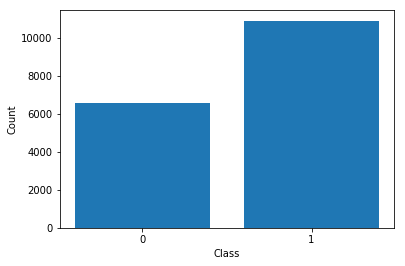

Positive cases: 62.355% of all


In [27]:
ploting_class(bridge_labels)

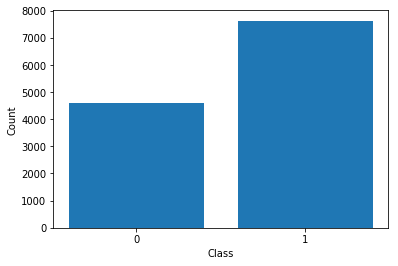

Positive cases: 62.352% of all


In [28]:
ploting_class(bridge_labels_train)

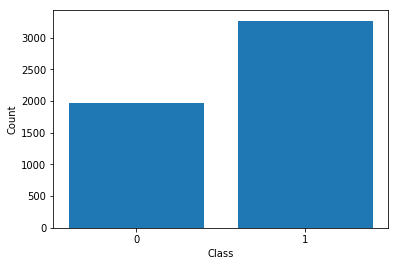

Positive cases: 62.362% of all


In [29]:
ploting_class(bridge_labels_test)

### Машинно обучение
#### 1. LogisticRegression
Оптимизирам хиперпараметрите ("C", "max_iter"), като изплзвам мрежата за търсене GridSearchCV в диапазона:
* `C`: 0.05, 0.1, 0.3, 0.5, 1, 10
* `max_iter`: 20, 30, 40, 50, 60, 70

In [30]:
tuned_params = [{"C": [0.05, 0.1, 0.3, 0.5, 1, 10], "max_iter": [20, 30, 40, 50, 60, 70]}]

In [31]:
grid_search = GridSearchCV(LogisticRegression(fit_intercept = False), tuned_params)

In [32]:
model_logistic_regression = grid_search.fit(bridge_features_train, bridge_labels_train)

In [33]:
model_logistic_regression.best_estimator_

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=30, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 2. GaussianSVC
Оптимизирам хиперпараметрите ("C", "gama"), като изплзвам мрежата за търсене GridSearchCV в диапазона:
* `C`: 40, 50, 60, 80, 100
* `gamma`: 0.0001, 0.0005, 0.001, 0.005

In [34]:
tuned_params = [{"C": [40, 50, 60, 80, 100], "gamma": [0.0001, 0.0005, 0.001, 0.005]}]

In [35]:
grid_search = GridSearchCV(SVC(kernel = 'rbf'), tuned_params)

In [36]:
model_gaussian_svm = grid_search.fit(bridge_features_train, bridge_labels_train)

In [37]:
model_gaussian_svm.best_estimator_

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 3. Decision Tree
Оптимизирам хиперпараметрите ("max_depth", "min_samples_leaf", "max_leaf_nodes"), като изплзвам мрежата за търсене GridSearchCV в диапазона:
* `max_depth`: 1, 5, 7, 15, 20
* `min_samples_leaf`: 2, 5, 10, 12
* `max_leaf_nodes`: 5, 10, 20

In [38]:
tuned_params = [{"max_depth": [1, 5, 7, 15, 20], "min_samples_leaf": [2, 5, 10, 12], "max_leaf_nodes": [5, 10, 20]}]

In [39]:
grid_search = GridSearchCV(DecisionTreeClassifier(), tuned_params)

In [40]:
model_decision_tree = grid_search.fit(bridge_features_train, bridge_labels_train)

In [41]:
model_decision_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Хиперпараметрите "min_samples_leaf" и "max_leaf_nodes" ще ги оптимизирам отново в нов диапазон:
* `min_samples_leaf`: 0.5, 1, 2, 3
* `max_leaf_nodes`: 20, 25, 30, 40

In [42]:
tuned_params = [{"min_samples_leaf": [0.5, 1, 2, 3], "max_leaf_nodes": [20, 25, 30, 40]}]

In [43]:
grid_search = GridSearchCV(DecisionTreeClassifier(max_depth = 7), tuned_params)

In [44]:
model_decision_tree = grid_search.fit(bridge_features_train, bridge_labels_train)

In [45]:
model_decision_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 4. Random Forest
Оптимизирам хиперпараметрите ("n_estimators", "max_depth"), като изплзвам мрежата за търсене GridSearchCV в диапазона:
* `n_estimators`: 100, 200, 300 
* `max_depth`: 20, 50, 100

In [46]:
tuned_params = [{"n_estimators": [100, 200, 300], "max_depth": [20, 50, 100]}]

In [47]:
grid_search = GridSearchCV(RandomForestClassifier(), tuned_params)

In [48]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [49]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Хиперпараметрите ("n_estimators", "max_depth") ще ги оптимизирам в нов диапазон:
* `n_estimators`: 300, 500, 1000 
* `max_depth`: 10, 20, 30

In [55]:
tuned_params = [{"n_estimators": [300, 500, 1000], "max_depth": [10, 20, 30]}]

In [56]:
grid_search = GridSearchCV(RandomForestClassifier(), tuned_params)

In [57]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [58]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Оценяване на алгоритмите
#### 1. Accuracy - Точност (брой правилно класифицирани проби):

In [59]:
def accuracy(data_labels_test, data_features_test, model):
    return accuracy_score(data_labels_test, model.predict(data_features_test))

In [60]:
logistic_regression_classifier_score, gaussian_svm_classifier_score, tree_classifier_score, forest_classifier_score = accuracy(bridge_labels_test, bridge_features_test, model_logistic_regression), accuracy(bridge_labels_test, bridge_features_test, model_gaussian_svm), accuracy(bridge_labels_test, bridge_features_test, model_decision_tree), accuracy(bridge_labels_test, bridge_features_test, model_random_forest)


print("Testing scores:")
print("Logistic Regression:", logistic_regression_classifier_score)
print("Gaussian SVM:", gaussian_svm_classifier_score)
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)


Testing scores:
Logistic Regression: 0.7104158718046547
Gaussian SVM: 0.7375047691720718
Decision tree: 0.7390309042350248
Random forest: 0.7516215185043876


#### 2. F1-score

In [62]:
def f1(data_labels_test, data_features_test, model):
    return f1_score(data_labels_test, model.predict(data_features_test))

In [63]:
logistic_regression_classifier_score, gaussian_svm_classifier_score, tree_classifier_score, forest_classifier_score = f1(bridge_labels_test, bridge_features_test, model_logistic_regression), f1(bridge_labels_test, bridge_features_test, model_gaussian_svm), f1(bridge_labels_test, bridge_features_test, model_decision_tree), f1(bridge_labels_test, bridge_features_test, model_random_forest)


print("Testing scores:")
print("Logistic Regression:", logistic_regression_classifier_score)
print("Gaussian SVM:", gaussian_svm_classifier_score)
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)

Testing scores:
Logistic Regression: 0.7936939385702637
Gaussian SVM: 0.7956637956637956
Decision tree: 0.7967914438502673
Random forest: 0.8085294117647058


За момента мога да заключа, че алгоритмите не се справят много зле. Най-добре обученият е Random forest. Все пак да не забравяме, че в началото изключих няколко категорийни променливи с цел по лесно и бързо обучение. Въпросът който си задавам сега е: Как да компенсирам тези категорийни променливи, така че новата променлива да е свързана с местоположението на моста и съответно да влияе на неговото състояние?

Отговорът на въпроса ми мисля, че се намира в следващата таблица - Средният дневен трафик NYS (AADT), а именно трафика на автомобили който преминава през даденото съоръжение.

Таблицата се състои от 15 променливи и 234 664 записа.

### Първи вариант - ще използвам променливите:
* `Region`
* `	AADT` - Средна годишна стойност на дневния трафик
    
Взимам за всеки регион средната стойност за AADT за всички години. Тук трафика нямада бъде толкова точен за съответното съоръжение, но в този случай не губя записи

In [64]:
traffic_data = pd.read_csv("Data/traffic.csv")

In [65]:
traffic_data.head()

,Region,RC_ID,GIS Code,Ramp,Begin Milepoint,End Milepoint,Roadway Begin Description,Roadway End Description,Municipality,Signing,Route Number,Road Name,Year,AADT,Count Type
0,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2014,15308,FORECAST
1,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2013,15394,ACTUAL
2,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2010,14163,ACTUAL
3,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2006,17070,ACTUAL
4,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2004,15910,ACTUAL


In [66]:
traffic_data.shape

(234664, 15)

In [67]:
traffic_data.Region.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

### Подготовка на данни

In [68]:
traffic_region_mean = traffic_data.groupby(["Region"])["AADT"].mean()

In [69]:
traffic_region_mean

Region
1      7785.890191
2      4894.039254
3      6960.430528
4      8107.792407
5      8128.185847
6      3074.470023
7      3371.509654
8     10743.928474
9      4376.100909
10    17031.780488
11    29568.438202
Name: AADT, dtype: float64

In [70]:
for index, value in traffic_region_mean.items():
    bridge_data.loc[(bridge_data["region_code"]) == (index), "traffic_region_mean"] = value

In [71]:
bridge_data.head()

,region_code,county_name,municipality,location,route_carried_reference_marker,owner,year_built,date_last_inspected,status,condition_rating,traffic_region_mean
0,1,Albany,Albany City,0.1 MI N JCT RTE 5 & I90,5 X,City,1968,2014-09-04T00:00:00,N,5.211,7785.890191
1,1,Albany,Albany City,JCT US 9 & PATROON CREEK,9 9 11081025,NYSDOT,1971,2015-10-27T00:00:00,N,4.750,7785.890191
2,1,Albany,Albany City,JCT RTE 9 & I90,9 9 11081028,NYSDOT,1971,2015-07-08T00:00:00,FO,4.833,7785.890191
3,1,Albany,Albany City,DOWNTOWN ALBANY,9 X,NYSDOT,1969,2015-10-14T00:00:00,FO,4.403,7785.890191
4,1,Albany,Albany City,0.1 MI S JCT RT 9W & I787,9W 9W11012007,NYSDOT,1966,2015-05-07T00:00:00,FO,4.328,7785.890191


In [72]:
bridge_data_ready = bridge_data.drop(["municipality", "location", "route_carried_reference_marker", "date_last_inspected"], axis = 1)

In [73]:
bridge_data_ready.head()

,region_code,county_name,owner,year_built,status,condition_rating,traffic_region_mean
0,1,Albany,City,1968,N,5.211,7785.890191
1,1,Albany,NYSDOT,1971,N,4.750,7785.890191
2,1,Albany,NYSDOT,1971,FO,4.833,7785.890191
3,1,Albany,NYSDOT,1969,FO,4.403,7785.890191
4,1,Albany,NYSDOT,1966,FO,4.328,7785.890191


In [74]:
bridge_data_ready = bridge_data_ready.dropna()
bridge_data_ready.shape

(17471, 7)

In [75]:
bridge_features = bridge_data_ready.drop(["condition_rating"], axis = 1)
bridge_labels = bridge_data_ready.condition_rating

In [76]:
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) <= 5]), 0)
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) > 5]), 1)

In [77]:
bridge_features = pd.get_dummies(bridge_features)

In [78]:
bridge_features.shape

(17471, 102)

In [79]:
bridge_features = MinMaxScaler(feature_range = (0, 1)).fit_transform(bridge_features)

In [80]:
bridge_features_train, bridge_features_test, bridge_labels_train, bridge_labels_test = train_test_split(bridge_features, bridge_labels, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = bridge_labels)

### Машинно обучение

#### Random Forest
Оптимизирам хиперпараметрите ("n_estimators", "max_depth"), като изплзвам мрежата за търсене GridSearchCV в диапазона:
* `n_estimators`: 200, 300, 400 
* `max_depth`: 10, 20, 30

In [81]:
tuned_params = [{"n_estimators": [200, 300, 400], "max_depth": [10, 20, 30]}]

In [82]:
grid_search = GridSearchCV(RandomForestClassifier(), tuned_params)

In [83]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [84]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Хиперпараметърът ("n_estimators") ще го оптимизирам в нов диапазон:
* `n_estimators`: 400, 600, 800

In [85]:
tuned_params = [{"n_estimators": [400, 600, 800]}]

In [86]:
grid_search = GridSearchCV(RandomForestClassifier(max_depth = 20), tuned_params)

In [87]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [88]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Оценяване на Random forest
#### 1. Accuracy - Точност (брой правилно класифицирани проби):

In [89]:
forest_classifier_score = accuracy(bridge_labels_test, bridge_features_test, model_random_forest)
print("Random forest:", forest_classifier_score)

Random forest: 0.7531476535673407


#### 2. F1-score

In [90]:
forest_classifier_score = f1(bridge_labels_test, bridge_features_test, model_random_forest)
print("Random forest:", forest_classifier_score)

Random forest: 0.8090882266155208



### Втори вариант - ще използвам променливите:
* `municipality`
* `	AADT` - Средна годишна стойност на дневния трафик

Взимам за всяка община средната стойност за AADT за всички години. Тук трафика е описан по-добре, но губя около 3 300 записа

За да мога да ги обединя по общини правя записите и в двете таблици с малки символи

### Подготовка на данни

In [91]:
bridge_data.municipality = bridge_data.municipality.str.lower()

In [92]:
bridge_data.municipality = bridge_data.municipality.str.partition(' ')[0]

In [93]:
traffic_municipality_mean = traffic_data.groupby(["Municipality"])["AADT"].mean()

In [94]:
traffic_municipality_mean.index = traffic_municipality_mean.index.str.lower()

In [95]:
len(traffic_municipality_mean.unique())

1270

In [96]:
for index, value in traffic_municipality_mean.items():
    bridge_data.loc[(bridge_data["municipality"]) == (index), "traffic_municipality_mean"] = value

In [97]:
len(bridge_data.traffic_municipality_mean.unique())

979

In [98]:
bridge_data_ready = bridge_data.drop(["municipality", "location", "route_carried_reference_marker", "date_last_inspected", "traffic_region_mean"], axis = 1)

In [102]:
bridge_data_ready = bridge_data_ready.dropna()

In [100]:
bridge_data.shape

(14176, 12)

In [103]:
bridge_data_ready.head()

,region_code,county_name,owner,year_built,status,condition_rating,traffic_municipality_mean
0,1,Albany,City,1968,N,5.211,16261.549645
1,1,Albany,NYSDOT,1971,N,4.750,16261.549645
2,1,Albany,NYSDOT,1971,FO,4.833,16261.549645
3,1,Albany,NYSDOT,1969,FO,4.403,16261.549645
4,1,Albany,NYSDOT,1966,FO,4.328,16261.549645


In [104]:
bridge_data_ready.shape

(14176, 7)

In [105]:
bridge_features = bridge_data_ready.drop(["condition_rating"], axis = 1)
bridge_labels = bridge_data_ready.condition_rating

In [106]:
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) <= 5]), 0)
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) > 5]), 1)

In [107]:
bridge_features = pd.get_dummies(bridge_features)
bridge_features.shape

(14176, 92)

In [108]:
bridge_features = MinMaxScaler(feature_range = (0, 1)).fit_transform(bridge_features)

In [109]:
bridge_features_train, bridge_features_test, bridge_labels_train, bridge_labels_test = train_test_split(bridge_features, bridge_labels, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = bridge_labels)

### Машинно обучение

#### Random Forest
Оптимизирам хиперпараметрите ("n_estimators", "max_depth"), като изплзвам мрежата за търсене GridSearchCV в диапазона:
* `n_estimators`: 300, 400, 500
* `max_depth`: 10, 20, 30

In [110]:
tuned_params = [{"n_estimators": [300, 400, 500], "max_depth": [10, 20, 30]}]

In [111]:
grid_search = GridSearchCV(RandomForestClassifier(), tuned_params)

In [112]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [113]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Хиперпараметърът ("n_estimators") ще го оптимизирам в нов диапазон:
* `n_estimators`: 200, 300, 400

In [114]:
tuned_params = [{"n_estimators": [200, 300, 400]}]

In [115]:
grid_search = GridSearchCV(RandomForestClassifier(max_depth = 20), tuned_params)

In [116]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [117]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Хиперпараметърът ("n_estimators") ще го оптимизирам в нов диапазон:
* `n_estimators`: 300, 400, 500, 600, 700

In [121]:
tuned_params = [{"n_estimators": [300, 400, 500, 600, 700]}]

In [122]:
grid_search = GridSearchCV(RandomForestClassifier(max_depth = 20), tuned_params)

In [123]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [124]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Оценяване на Random forest
#### 1. Accuracy - Точност (брой правилно класифицирани проби):

In [125]:
forest_classifier_score = accuracy(bridge_labels_test, bridge_features_test, model_random_forest)
print("Random forest:", forest_classifier_score)

Random forest: 0.7575828826710558


#### 2. F1-score

In [126]:
forest_classifier_score = f1(bridge_labels_test, bridge_features_test, model_random_forest)
print("Random forest:", forest_classifier_score)

Random forest: 0.8205395996518713


### Извод: 
От обучените алгоритми най-добрия е Random forest. След като добавих още една променлива(трафик) резултатите не се подобриха значително, но в първия случай трафика не описва добре съоръженията. Във втория случай след като описвам средния среднодневен трафик за общинете изгубих доста данни.

Как бихме могли да подобрим резултатите?

1. Да оставим категорийните променливи, но обучението ще бъде много бавно
2. Данните за трафика може да се вземат за предходната година и ако е възможно да описват съответната улица на съоръжението без да се губят данни.